### 함수
함수(function)는 입력 값을 출력 값으로 바꾸어 출력하는 관계(relationship)를 말한다. 맵(map), 매핑(mapping), 또는 딕셔너리(dictionary)이라는 용어를 사용하기도 한다. 예를 들어  1,2,3,…  란 숫자를 입력받아서 두 배가 되는  2,4,6,… 을 출력하는 것은 함수라고 할 수 있다.

함수에서 입력변수가 가질 수 있는 값의 집합을 정의역(domain), 출력변수가 가질 수 있는 값의 집합을 공역(range)이라고 한다. 정의역은 실수 전체인 경우가 많다. 하지만 함수에 따라서는 일부 숫자만 정의역으로 가질 수도 있다.

### 표를 사용한 함수 구현

만약 정의역이 유한 개의 원소로만 이루어져 있다면 함수는 일종의 표(lookup table)가 된다. 정의역이 유한개여서 표로 나타낼 수 있는 함수는 파이썬의 딕셔너리(dictionary)로 구현할 수 있다.

In [1]:
# 함수정의
f = {
    1: 2,
    2: 4, 
    3: 6,
    4: 8,
    5: 10,
}

In [2]:
# 함수 사용
f[1]

2

### 변수
만약 정의역이 무한 개의 원소로 이루어졌다면 더이상 표나 딕셔너리를 사용해서 함수를 구현할 수 없다. 이 때는 변수와 수식을 사용하여 입력과 출력간의 관계를 정의해야 한다.

변수(variable)란 어떤 숫자를 대표하는 기호이다. 함수에서 입력 값이나 출력 값을 기호 즉 변수로 나타내기도 한다. 입력 값을 대표하는 변수를 입력변수(input variable)라 하고 출력 값을 대표하는 변수를 출력변수(output variable)라고 한다. 변수는 보통  𝑥 ,  𝑦 ,  𝑧  등의 알파벳 소문자로 표시한다. 함수에서 기호를 사용하는 이유는 입력 값과 출력 값의 관계를 수식으로 표현하기 위해서이다. 예를 들어 어떤 숫자를 입력으로 받아 그 값의 2배가 되는 값을 출력으로 한다면 다음과 같이 표현할 수 있다.

$$x \rightarrow 2x$$

또는

$$y = 2x$$

함수를 여러개 사용할 때는 이름을 붙여 구별한다. 변수와 마찬가지로 함수도  𝑓 ,  𝑔 ,  ℎ 와 같이 알파벳 소문자로 표시한다. 함수를 표기할 때는 다음과 같이 입력변수를 붙여서  𝑓(𝑥) 라고 표기한다. 이 기호는 "f of x" 라고 읽는다.

$$ f(x) = 2x$$

In [3]:
# 함수정의
def f(x):
    return 2 * x

# 함수 사용
x = 10
y = f(x)

print("f({}) = {}".format(x, y))

f(10) = 20


### 연속과 불연속
함수의 값이 중간에 갑자기 변하는 것을 불연속(discontinuous)이라고 하고 그렇지 않으면 연속(continuous)이라고 한다. 다음에 설명할 부호함수, 단위계단함수, 지시함수는 데이터 분석에서 자주 등장하는 불연속함수다.

####  불연속함수1 : 부호함수
부호함수(sign function)는 입력이 양수이면 1, 음수이면 -1, 0이면 0을 출력하는 0에서 불연속인 함수이다. 넘파이에서는 sign 명령으로 구현되어 있다.

\begin{align}
\text{sign}(x) 
=
\begin{cases} 
1, & x > 0, \\ 
0, & x = 0, \\ 
-1, & x < 0 
\end{cases} 
\end{align}

In [6]:
import numpy as np
np.sign(-0.001), np.sign(0), np.sign(0.001)

(-1.0, 0, 1.0)

####  불연속함수2 :  단위계단함수
단위계단함수(Heaviside step function)도  𝑥=0 에서 불연속인 함수이다. 넘파이 구현이 없으므로 직접 구현해야 한다.

\begin{align}
H(x) =
\begin{cases} 
1, & x \ge 0, \\ 
0, & x < 0  
\end{cases}
\end{align}

In [10]:
def heaviside_step(x):
    if isinstance(x, np.ndarray):  # isinstance 객체의 타입: 체크 x가 ndarray인지 참이면...
        return np.where(x >= 0, 1, 0)  # 주어진 배열 값 중 0보다 크거나 같으면 1, 아니면 0 
    else:
        return 1.0 if x >=0 else 0.0

In [8]:
## np.where 예
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
np.where(a < 5, a, 10 * a)  # a가 5보다 작으면 그대로 a 값을 리턴하고 그 외에는 a *10을 리턴

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [11]:
heaviside_step(-0.001), heaviside_step(0), heaviside_step(0.001)

(0.0, 1.0, 1.0)

####  불연속함수3 : 지시함수

다음 함수는 지시함수(indicator function)라는 함수로 함수 이름에 아래 첨자로 미리 지정된 값이 들어오면 출력이 1이 되고 아니면 출력이 0이 된다.

\begin{align}
\mathbb{I}_i(x)
=
\delta_{ij} 
=
\begin{cases}
1 & \text{ if } x = i \\ 
0 & \text{ if } x \neq i \\ 
\end{cases}
\end{align}

지시함수는 다음처럼 표기하기도 한다.

\begin{align}
\mathbb{I}(x=i)
=
\begin{cases}
1 & \text{ if } x = i \\ 
0 & \text{ if } x \neq i \\ 
\end{cases}
\end{align}

지시함수는 데이터 중에서 특정한 데이터만 선택하여 갯수를 세는데 사용된다. 예를 들어 데이터  𝑥1,𝑥2,…,𝑥𝑁  중에서 값이 0인 데이터의 갯수와 값이 1인 데이터의 갯수는 지시함수를 사용하여 다음처럼 표시한다.

$$N_0 = \sum_{i=1}^N \mathbb{I} (x_i=0)$$
$$N_1 = \sum_{i=1}^N \mathbb{I} (x_i=1)$$

### 역함수
어떤 함수의 입력/출력 관계와 정반대의 입출력 관계를 갖는 함수를 역함수(inverse function)라고 한다.

예를 들어 어떤 함수  𝑓 가  1,2,3,…  를 입력받아서  1,4,9,…  을 출력하고 다른 함수  𝑔 는 반대로  1,4,9,…  를 입력받아서  1,2,3,…  을 출력하면 두 함수  𝑓 ,  𝑔 는 서로 역함수이다.

함수  𝑓 의 역함수는  𝑓−1  기호로 표시한다.

$$y = f(x), \;\;\; \rightarrow \;\;\; x = f^{-1}(y) $$


함수의 "역함수"와 함수의 "역수"는 기호와 의미가 모두 다르다는 점에 주의한다.

$$f^{-1}(x) \neq f(x)^{-1} = \dfrac{1}{f(x)}$$


함수가 존재한다고 해서 항상 역함수가 존재할 수 있는 것은 아니다. 예를 들어 두 개의 서로 다른  𝑥1 ,  𝑥2 값에 대해  𝑦 의 값이  𝑦∗ 로 같다고 하자.

$$f(x_1) = y^{\ast}$$
$$f(x_2) = y^{\ast}$$

그러면 반대로  𝑦∗ 에 대응하는  𝑥  값을 선택할 수 없기 때문에 역함수가 존재하지 않는다. (x, y가 일대일로 대응되어야만 역함수가 존재한다고 할 수 있음)

#### 예제
다음 함수는 역함수가 존재하지 않는다.
$$f(x) = x^2$$

이 함수의 역함수가 존재하려면 정의역을 양수로 제한해야 한다 ( 𝑥>0 ) 이 때는 다음과 같이 역함수가 존재한다.
$$f^{-1}(x) = \sqrt{x}$$

### 함수의 그래프

함수의 형상을 시각적으로 파악하기 위해 그래프(graph) 또는 플롯(plot)를 사용하기도 한다.

파이썬에서는 맷플롯리브의 라인 플롯을 사용하여 그래프를 만들 수 있다. 다만 맷플롯리브에서는 그래프를 작성할 영역을 작은 구간으로 나눈 독립변숫값 벡터  𝑥 를 생성하고 이 위치에 대한 함숫값 벡터  𝑦 를 하나하나 계산하여 이렇게 만들어진 점을 직선으로 연결하는 방식으로 플롯을 그린다. 따라서 구간 간격이 너무 크면 그래프가 부정확해지고, 구간 간격이 너무 작으면 계산 시간이 증가하며 메모리 등의 리소스가 낭비된다.

맷플롯리브로 다음과 같은 함수의 그래프를 그려보자.

$$ f(x) = x^3 - 3x^2 + x $$ 


In [43]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set_style("whitegrid")

mpl.rcParams['axes.unicode_minus'] = False

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)

In [44]:
def f(x):
    return x**3 - 3*x**2 + x

우선  𝑥=−1  부터  𝑥=3 까지 0.5 간격으로 9개의 점을 찍는다

In [45]:
x = np.linspace(-1, 3, 9)
x

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])

그리고 이 위치에 대해  𝑦=𝑓(𝑥) 값을 구한다.

In [46]:
y = f(x)
y

array([-5.   , -1.375,  0.   , -0.125, -1.   , -1.875, -2.   , -0.625,
        3.   ])

맷플롯리브가 그리는 그래프는 이 표에 나타난  𝑥,𝑦  쌍을 직선으로 연결한 그림이다.

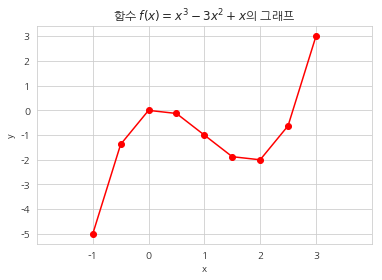

In [47]:
plt.plot(x, y, 'ro-')
plt.xlim(-2, 4)
plt.title("함수 $f(x) = x^3 - 3x^2 + x$의 그래프")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.show()

이  𝑥 ,  𝑦  벡터의 구간을 더 조밀하게 만들면 그래프는 곡선으로 보이게 된다. 다음 그래프는 곡선으로 보이지만 실제로는 약 400개의 직선이 연결된 것이다.

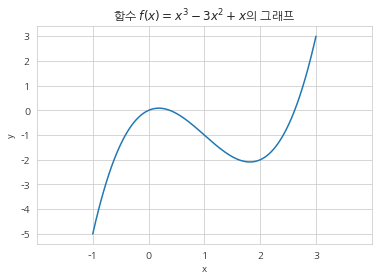

In [48]:
x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)
plt.xlim(-2, 4)
plt.title("함수 $f(x) = x^3 - 3x^2 + x$의 그래프")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.show()

### Practice 1.
맷플롯리브로 부호함수와 단위계단함수의 라인플롯을 그려라.

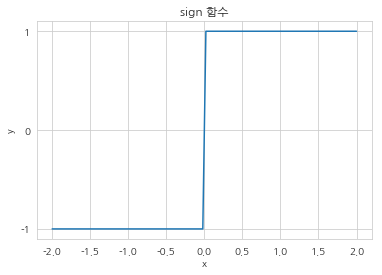

In [49]:
# 부호함수
x = np.linspace(-2, 2, 100)
y = np.sign(x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.yticks([-1, 0, 1])
plt.title("sign 함수")
plt.show()

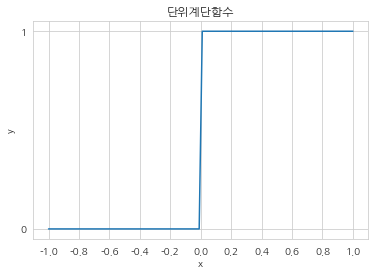

In [51]:
# 단위계단함수
x = np.linspace(-1, 1, 100)
y = heaviside_step(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(-1, 1.2, 0.2))
plt.yticks([0, 1])
plt.title("단위계단함수")
plt.show()

### 역함수의 그래프
역함수의 그래프는 원래의 함수에서  𝑥 축과  𝑦 축과 바뀐 것이므로  𝑦=𝑥 가 나타내는 직선(원점을 통과하는 기울기 1인 직선)을 대칭축으로 대칭인 함수의 그래프와 같다.

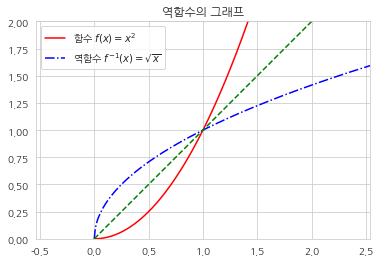

In [52]:
def f1(x):
    return x ** 2

def f1inv(x):
    return np.sqrt(x)

x = np.linspace(0, 3, 300)
plt.plot(x, f1(x), "r-", label="함수 $f(x) = x^2$")
plt.plot(x, f1inv(x), "b-.", label="역함수 $f^{-1}(x) = \sqrt{x}$")
plt.plot(x, x, "g--")
plt.axis("equal")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.legend()
plt.title("역함수의 그래프")
plt.show()

### 데이터 분석에서 많이 사용되는 함수들

데이터 분석에는 다양한 함수가 사용된다. 여기에서는 몇 가지 간단한 예를 보인다.

#### 다항식함수
다항식(polynomial)함수는 상수항  $𝑐_0$ , 일차항  $𝑐_1𝑥$ , 이차항  $𝑐_2𝑥_2$ ,  ⋯  등의 거듭제곱 항의 선형조합으로 이루어진 함수다.
$$f(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_n x^n $$


#### 최대함수와 최소함수
최대함수는 두 개의 인수 중에서 큰 값을 출력하는 함수이다.
\begin{align}
\max(x, y) 
=
\begin{cases}
x & \text{ if } x \geq y \\
y & \text{ if } x < y 
\end{cases}
\end{align}

최소함수는 최대함수와 반대로 두 개의 인수 중 작은 값을 출력하는 함수이다.
\begin{align}
\min(x, y) 
=
\begin{cases}
x & \text{ if } x \leq y \\
y & \text{ if } x > y 
\end{cases}
\end{align}

최대함수는 원래 두 개의 입력을 갖는 함수이지만 보통  𝑦=0 으로 고정해서 입력값  𝑥 가 양수이면 그대로 출력하고 음수일 때는 0으로 만들 때 주로 사용한다.

\begin{align}
\max(x, 0) 
=
\begin{cases}
x & \text{ if } x \geq 0 \\
0 & \text{ if } x < 0 
\end{cases}
\end{align}

인공신경망에서는 이 함수를 ReLU(Rectified Linear Unit)라고 부른다.

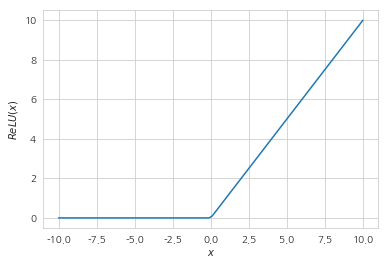

In [53]:
# 최대함수 ReLU(Rectified Linear Unit) 그래프
xx = np.linspace(-10, 10, 100)
plt.plot(xx, np.maximum(xx, 0))
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

#### 지수함수
정해진 어떤 값을 입력 값으로 거듭제곱하여 출력을 구하는 함수를 생각해보자.

$$y = a^x$$ 

거듭제곱을 할 때 아래에 있는 수를 밑(base)라고 한다. 밑을 오일러 수  𝑒 (약 2.718)로 하여 거듭제곱을 하는 함수를 지수함수(exponential function)라고 한다.

$$y = e^x$$ 

지수함수는 다음처럼 표시할 수도 있다.

$$y = \exp (x) =\exp x$$

넘파이에서는 e 명령으로 오일러 수를, exp 명령으로 지수함수를 계산한다. 여러가지 값을 대입하여 지수함수의 값을 구해 위 성질이 성립하는지 살펴보자.

In [54]:
np.e

2.718281828459045

In [55]:
np.exp(-10), np.exp(-1), np.exp(-0.1), np.exp(0), np.exp(0.1), np.exp(1), np.exp(10)

(4.5399929762484854e-05,
 0.36787944117144233,
 0.9048374180359595,
 1.0,
 1.1051709180756477,
 2.718281828459045,
 22026.465794806718)

지수함수는 다음과 같은 특성을 갖는다.

+ 양수( 𝑒 )를 거듭제곱한 값이므로 항상 양수다.
+ 𝑥=0 일 때 1이 된다.
+ 𝑥 가 양의 무한대로 가면( 𝑥→∞ ), 양의 무한대로 다가간다.
+ 𝑥 가 음의 무한대로 가면( 𝑥→−∞ ), 0으로 다가간다.
+ $𝑥_1 > 𝑥_2$ 이면  exp   $𝑥_1$ > exp  $𝑥_2$ 이다.

위 특성에 의해 지수함수의 그래프는 다음처럼 그려진다.


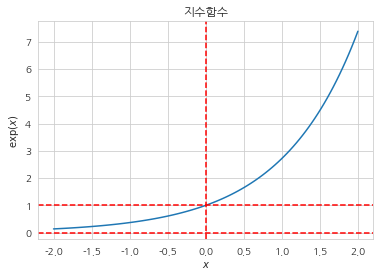

In [60]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)
plt.title("지수함수")
plt.plot(xx, yy)
plt.axhline(1, c='r', ls='--')
plt.axhline(0, c='r', ls='--')
plt.axvline(0, c='r', ls='--')
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()

두 지수함수의 곱의 값은 입력값 합의 지수함수 값과 같다.

$$f(x_1) \cdot f(x_2) = e^{x_1} \cdot e^{x_2} = e^{x_1 + x_2} = f(x_1 + x_2)$$


In [62]:
np.exp(2 + 3), np.exp(2) * np.exp(3)

(148.4131591025766, 148.4131591025766)

#### 로지스틱함수
로지스틱(logistic) 함수는 지수함수를 변형한 함수로 회귀 분석이나 인공신경망에서 자주 사용된다. 로지스틱함수는 원래 시그모이드(sigmoid) 함수라는 종류의 하나다. 하지만 시그모이드 함수 중에서는 로지스틱함수가 가장 널리 쓰이기 때문에 보통 시그모이드 함수라고 하면 이 로지스틱함수를 뜻한다.

$$\sigma(x) = \dfrac{1}{1 + \exp(-x)} $$


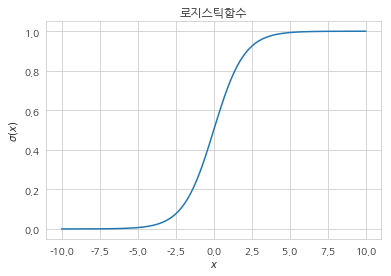

In [63]:
def logistic(x):
    return 1 / ( 1 + np.exp(-x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx))
plt.title("로지스틱함수")
plt.xlabel('$x$')
plt.ylabel("$\sigma(x)$")
plt.show()

#### 로그함수
𝑒 를 거듭제곱하여 특정한 값이 되는 수를 찾아야 할 때가 있다. 예를 들어  𝑒 를 제곱하면 약 7.4가 되고 세제곱하면 약 20이 된다.

In [64]:
np.exp(2), np.exp(3)

(7.38905609893065, 20.085536923187668)

그렇다면 몇 제곱을 해야  10 이라는 값이 될까?  𝑒 를 약 2.3025851 거듭제곱을 하면 10이 되는 것을 확인할 수 있다. 이렇게  𝑒 를 거듭제곱하여 특정한 수  𝑎 가 되도록 하는 수를  log𝑎 라 표기하고 로그(log)라고 읽는다.

In [65]:
np.exp(2.3025851)

10.000000070059542

넘파이에서 로그함수 명령은 log이다.

In [66]:
np.log(10)

2.302585092994046

지수함수에서 밑이  𝑒 가 아닌 경우에는 다음처럼 로그를 이용하여 계산할 수 있다.
$$y = a^x = (e^{\log a})^x = e^{x \log a} $$


로그는 지수함수의 출력이 특정한 값이 되게 하는 입력을 찾는 것이므로 지수함수의 역함수이다.

$$y = \log x$$ 


로그함수는 다음과 같은 특징을 가진다.

+ 𝑥 값, 즉 입력변수값이 양수이어야 한다. 0이거나 음수이면 정의되지 않는다.
+ 𝑥>1 면  𝑦>0  (양수)
+ 𝑥=1 이면  𝑦=0 
+ 0<𝑥<1 면  𝑦<0  (음수)
+ 𝑥1>𝑥2 면  log𝑥1>log𝑥2 이다.

로그함수의 그래프는 다음과 같은 형태를 띈다.

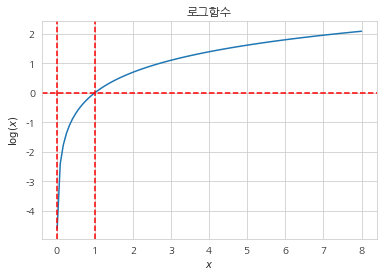

In [70]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)
plt.title("로그함수")
plt.plot(xx, yy)
plt.axhline(0, c="r", ls="--")
plt.axvline(0, c='r', ls="--")
plt.axvline(1, c='r', ls='--')
plt.xlabel("$x$")
plt.ylabel("$\log(x)$")
plt.show()

로그함수는 확률론에서 가장 많이 사용되는 함수다. 그 이유는 로그함수가 갖는 다음과 같은 특이한 성질 때문이다.

##### 로그함수의 성질 1: 로그함수는 곱하기를 더하기로 변환한다.

$$\log{(x_1 \cdot x_2)} = \log{x_1} + \log{x_2}$$


이 성질을 확장하면 다음과 같이 표기한다.
$$\log{\left(\prod_i x_i\right)} = \sum_i \left(\log{x_i}\right) $$


위 식에서  𝑥1=𝑥2=⋯=𝑥  라면

$$\log x^n = n \log x $$


### Practice 2
log2 의 값은 약 0.69,  log3 의 값은 약 1.10 이다. 이 때  log12 의 값을 구하라.

In [71]:
np.log(2)

0.6931471805599453

In [72]:
np.log(3)

1.0986122886681098

In [75]:
np.log(2) * 2 + np.log(3) 

2.4849066497880004

In [74]:
np.log(12)

2.4849066497880004

### Practice 3
로지스틱함수의 역함수를 구하라.

$$y = 1 / (1 + exp(-x))$$
$$x = 1 / (1 + exp(-y))$$
$$y = log(1 - 1/x) $$

##### 로그함수의 성질 2: 어떤 함수에 로그를 적용해도 함수의 최고점, 최저점의 위치는 변하지 않는다.
만약 양수값만을 갖는 함수가 있을 때 이 함수에 다시 로그함수를 적용하면 높낮이는 바뀌지만 최고점이나 최저점의 위치는 바뀌지 않는다. 따라서 최적화할 때 원래의 함수가 아니라 로그를 취한 함수에 대해 최적화를 하는 경우가 많다.

$$\arg\max_x f(x) = \arg\max_x \log f(x)$$


위 식에서  $argmax_𝑥 𝑓(𝑥)$ 는  𝑓 값을 최대로 만들어주는  𝑥 의 값을 뜻한다.

In [76]:
def ff(x):
    return x**3 - 12*x + 20 * np.sin(x) + 7

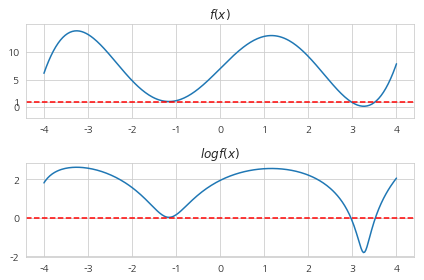

In [81]:
xx = np.linspace(-4, 4, 300)
yy = ff(xx)

plt.subplot(211)
plt.plot(xx, yy)
plt.axhline(1, c='r', ls='--')
plt.yticks([0, 1, 5, 10])
plt.ylim(-2, 15)
plt.title("$f(x)$")

plt.subplot(212)
plt.plot(xx, np.log(yy))
plt.axhline(0, c='r', ls="--")
plt.title("$log f(x)$")

plt.tight_layout()
plt.show()

##### 로그함수의 성질 3: 로그함수는 0부터 1사이의 작은 값을 확대시켜 보여준다.

로그함수는 0부터 1사이의 구간을 음의 무한대부터 0까지로 확장시켜주기 때문에 확률값처럼 0과 1사이에 있는 작은 값을 더 확실하게 비교할 수 있도록 한다.

In [82]:
np.random.seed(0)
x = np.random.rand(5)  # 0~1 난수 발생
x = x / x.sum()
x

array([0.19356424, 0.25224431, 0.21259213, 0.19217803, 0.14942128])

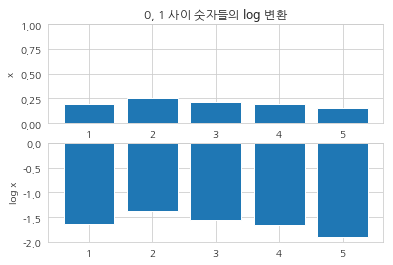

In [86]:
plt.subplot(211)
plt.title("0, 1 사이 숫자들의 $\log$ 변환")
plt.bar(range(1, 6), x)
plt.ylim(0, 1)
plt.ylabel("x")
plt.subplot(212)
plt.bar(range(1, 6), np.log(x))
plt.ylabel("log x")
plt.show()

#### 소프트플러스함수
소프트플러스(softplus)함수는 지수함수와 로그함수를 결합하여 만든 함수로 0을 인수로 갖는 최대함수와 비슷하지만  𝑥=0  근처에서 값이 부드럽게 변한다는 장점이 있다.

$$\zeta(x) = \log( 1 + \exp(x))$$

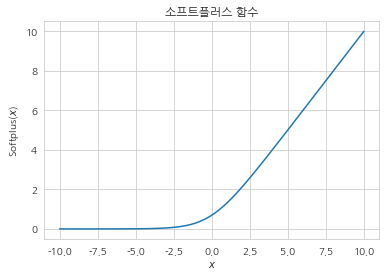

In [87]:
def softplus(x):
    return np.log(1 + np.exp(x))

xx = np.linspace(-10, 10, 100)
plt.plot(xx, softplus(xx))
plt.title("소프트플러스 함수")
plt.xlabel("$x$")
plt.ylabel("Softplus($x$)")
plt.show()

### 다변수함수

함수는 복수의 입력변수를 가질 수도 있다. 이러한 함수를 다변수함수(multivariate function)라고 한다. 예를 들어 다음 수식은 함수  𝑓 가 2개의 입력변수  𝑥 ,  𝑦 를 받아서 변수  𝑧 를 출력하는 다변수함수라는 뜻이다. 2차원 (다변수)함수라고도 한다.

$$z = f(x, y)$$ 

두 개의 독립변수를 갖는 함수  𝑓(𝑥,𝑦) 의 예로는 위도  𝑥 와 경도  𝑦 를 입력받아 해발 고도  𝑧 를 출력하는 함수이다.

따라서 2차원 함수는 평면상의 지형과 같기 때문에 3차원 서피스 플롯(surface plot), 또는 컨투어 플롯(contour plot)으로 나타낼 수 있다.

#### 예제
다음은 2차원 다변수함수의 예다.

$$f(x, y) = 2x^2 + 6xy + 7y^2 - 26x - 54y + 107$$


In [88]:
def f(x, y):
    return 2*x**2 + 6*x*y + 7*y**2 - 26*x - 54*y + 107

In [90]:
xx = np.linspace(-3, 7, 100)
yy = np.linspace(-3, 7, 100)
X, Y = np.meshgrid(xx, yy)
Z = f(X, Y)

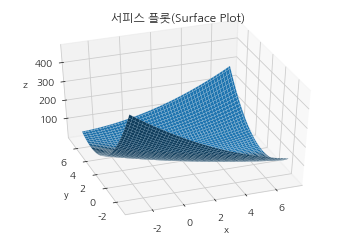

In [95]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0.1)
ax.view_init(40, -110)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
plt.title("서피스 플롯(Surface Plot)")
plt.show()

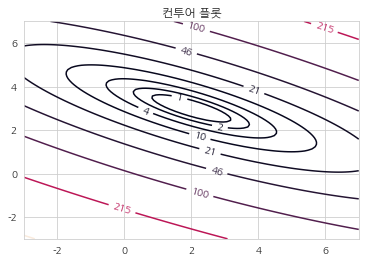

In [96]:
CS = plt.contour(X, Y, Z, levels=np.logspace(0, 3, 10))
plt.clabel(CS, fmt="%d")
plt.title("컨투어 플롯")
plt.show()

#### 1. 분리 가능 다변수함수
다변수함수 중에는 단변수함수의 곱으로 표현 가능한 다변수함수도 있다.

$$f(x, y) = f_1(x) f_2(y)$$


이러한 다변수함수를 분리 가능 다변수함수(separable multivariate function)이라고 하며 추후 확률변수에서 중요한 역할을 한다.

2차원 함수는 3차원 공간상의 지형에 비유할 수 있다. 2차원 함수에서  𝑥  값을 어떤 상수  𝑥0 로 고정하거나

$$x=x_0$$

또는  𝑦  값을 어떤 상수  𝑦0 로 고정하자.

$$y=y_0$$

그러면 움직일 수 있는 변수가 이제 하나이므로 이 함수는 1차원 단변수함수가 된다. 이 단변수함수의 모양은 3차원 공간상의 지형을 케이크 자르듯이 나눌 때 생기는 단면의 모양과 같다.

그런데 분리 가능 다변수함수는 단면의 모양이 모두 같다. 예를 들어  𝑥=𝑥0 로 고정하면 단면 함수는

$$g(x_0,y) = g(x_0)g(y) = k_0 g(y)$$

이므로  𝑥0 의 값과 상관없이  𝑔(𝑦) 의 높이만 조절한 모양이 된다.

#### 예제
다음 함수는 분리 가능 다변수함수의 한 예이다.
$$g(x, y) = \exp(-x^2 - 16y^2) = \exp(-x^2)\exp(-16y^2) = g_1(x)g_2(y)$$

아래의 그림은  𝑦=0,0.1,0.2,0.3 로 고정했을 때 생기는 단면의 모양을 나타낸 것이다.

In [99]:
from matplotlib import transforms
from matplotlib.ticker import NullFormatter

def g1(x):  # y = 0
    return np.exp(-x ** 2)

def g2(y): # x = 0
    return np.exp(-16 * y**2)

def g(x, y):
    return g1(x) * g2(y)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z = g(X, Y)

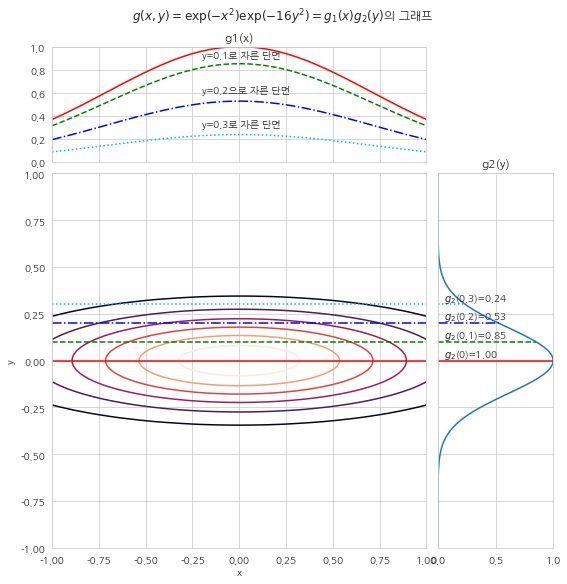

In [100]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect = [left, bottom, width, height]
rectx = [left, bottom_h, width, 0.2]
recty = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8, 8))
ax = plt.axes(rect)
axx = plt.axes(rectx)
axy = plt.axes(recty)

nullfmt = NullFormatter()
axx.xaxis.set_major_formatter(nullfmt)
axy.yaxis.set_major_formatter(nullfmt)

ax.contour(X, Y, Z)
ax.axhline(0, c='r', ls="-")
ax.axhline(0.1, c='g', ls="--")
ax.axhline(0.2, c='b', ls="-.")
ax.axhline(0.3, c='c', ls=":")
ax.set_xlabel("x")
ax.set_ylabel("y")

axx.plot(xx, g1(xx), c='r')
axx.plot(xx, g2(0.1) * g1(xx), c='g', ls="--")
axx.plot(xx, g2(0.2) * g1(xx), c='b', ls="-.")
axx.plot(xx, g2(0.3) * g1(xx), c='c', ls=":")
axx.set_title("g1(x)")
axx.text(-0.2, 0.3, "y=0.3로 자른 단면")
axx.text(-0.2, 0.6, "y=0.2으로 자른 단면")
axx.text(-0.2, 0.9, "y=0.1로 자른 단면")

base = axy.transData
rot = transforms.Affine2D().rotate_deg(-90)
axy.plot(yy, g2(yy), transform=rot + base)
axy.set_title("g2(y)")
axy.axhline(0, xmax=g2(0), c='r', ls="-")
plt.text(0.05, 0.02, "$g_2$(0)={:.2f}".format(g2(0)))
axy.axhline(0.1, xmax=g2(0.1), c='g', ls="--")
plt.text(0.05, 0.12, "$g_2$(0.1)={:.2f}".format(g2(0.1)))
axy.axhline(0.2, xmax=g2(0.2), c='b', ls="-.")
plt.text(0.05, 0.22, "$g_2$(0.2)={:.2f}".format(g2(0.2)))
axy.axhline(0.3, xmax=g2(0.3), c='c', ls=":")
plt.text(0.05, 0.32, "$g_2$(0.3)={:.2f}".format(g2(0.3)))

axx.set_xlim(ax.get_xlim())
axx.set_ylim(0, 1)
axy.set_ylim(ax.get_ylim())
axy.set_xlim(0, 1)

plt.suptitle("$g(x, y) = \exp(-x^2)\exp(-16y^2) = g_1(x)g_2(y)$의 그래프", y=1.04)
plt.show()

### 다변수 다출력 함수

어떤 함수는 입력변수 뿐 아니라 출력변수도 여러개일 수 있다. 이 경우에는 출력을 벡터나 행렬로 나타낼 수 있다.

예를 들어 소프트맥스(softmax)함수는 다차원 벡터를 입력받아 다차원 벡터를 출력한다. 다음은 3차원 소프트맥스 함수이다.

\begin{align}
y =
\begin{bmatrix}
y_1 \\ y_2 \\ y_3
\end{bmatrix}
=S(x_1, x_2, x_3) = 
\begin{bmatrix}
\dfrac{\exp(w_1x_1)}{\exp(w_1x_1) + \exp(w_2x_2) + \exp(w_3x_3)} \\
\dfrac{\exp(w_2x_2)}{\exp(w_1x_1) + \exp(w_2x_2) + \exp(w_3x_3)} \\
\dfrac{\exp(w_3x_3)}{\exp(w_1x_1) + \exp(w_2x_2) + \exp(w_3x_3)} \\
\end{bmatrix}
\end{align}

출력 벡터는 다음과 같은 특성을 갖는다.

+ 모든 출력 원소는 0와 1 사이값을 갖는다.
+ 모든 출력 원소의 합은 1이다.
+ 입력 원소의 크기 순서와 출력 원소의 크기 순서가 같다.

소프트맥스함수는 다변수 입력을 확률(probability)처럼 보이게 출력한다. 이러한 특성 때문에 인공신경망의 마지막단에서 출력을 조건부확률로 변형하는 데 사용된다.

In [101]:
def softmax(x, w):  # x는 1차원 배열, w는 가중치 벡터
    e = np.exp(w * x)
    return np.exp(w * x) / e.sum()  # 확률처럼 출력

x = [2.0, 1.0, 0.5]
y = softmax(x, np.ones(3))
y

array([0.62853172, 0.2312239 , 0.14024438])

In [102]:
np.sum(y)

1.0

가중치가 커지면 최대값과 최소값의 차이가 더 벌어진다.

In [103]:
softmax(x, 4 * np.ones(3))

array([0.97962921, 0.01794253, 0.00242826])

### 함수의 평행이동
단변수함수를 그래프 상에서 오른쪽으로 𝑎 만큼 평행이동 하려면 다음과 같이 함수식을 바꾸면 된다.

$$f(x) \;\; \rightarrow \;\; f(x-a)$$

즉 함수식에서  𝑥 로 표기된 부분을 모두  𝑥−𝑎 라는 글자로 바꾼다.
예를 들어 함수

$$f(x) = x^2 + 2x$$

를 오른쪽으로 2만큼 이동하려면

$$f(x-2) = (x-2)^2 + 2(x-1)$$

로 바꾼다.

단변수함수를 그래프 상에서 위로  𝑏 만큼 평행이동하려면 다음과 같이 함수식을 바꾼다.

$$f(x) \;\; \rightarrow \;\; f(x) + b$$

다음 그래프는 로지스틱함수를 오른쪽으로 5, 아래로 1만큼 이동한 것이다.

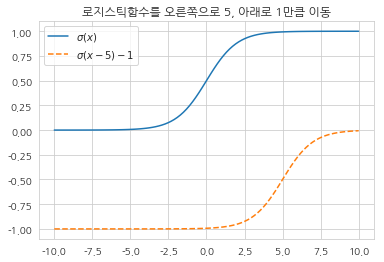

In [104]:
xx = np.linspace(-10, 10, 100)
plt.plot(xx, logistic(xx), label="$\sigma(x)$", ls='-')
plt.plot(xx, logistic(xx-5) - 1, label="$\sigma(x-5)-1$", ls="--")
plt.legend()
plt.title("로지스틱함수를 오른쪽으로 5, 아래로 1만큼 이동")
plt.show()

변수가 두 개인 다변수함수를 오른쪽으로 a만큼, 위로 b만큼 평행이동할 때는 함수를 다음처럼 변형한다.

$$ f(x, y) \;\; \rightarrow \;\; f(x-a, y-a)$$

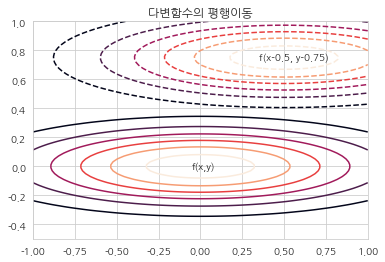

In [106]:
def g(x, y):
    return np.exp(-x ** 2 - 16 * y ** 2)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xx, yy)
Z1 = g(X, Y)
Z2 = g(X-0.5, Y-0.75)   # 0.5만큼 오른쪽으로 이동 0.75만큼 위로 이동 : 그래프의 중심이 원점에서 0.5, 0.75로 이동
plt.contour(X, Y, Z1)
plt.contour(X, Y, Z2, linestyles="--")
plt.text(-0.05, -0.02, "f(x,y)")
plt.text(0.35, 0.73, "f(x-0.5, y-0.75)")
plt.ylim(-0.5, 1)
plt.title("다변함수의 평행이동")
plt.show()

### 함수의 스케일링

단변수함수를 x축 방향으로 a배만큼 늘릴려면 함수를 다음처럼 변형한다.

$$f(x) \;\; \rightarrow \;\; f\left(\frac{x}{a}\right)$$

단변수함수를 y축 방향으로 b배만큼 늘릴려면 함수를 다음처럼 변형한다.
$$f(x) \;\; \rightarrow \;\; bf(x)$$

다음 그래프는 로지스틱함수를 x축 방향으로 1/2배, y축 방향으로 2배한 것이다.

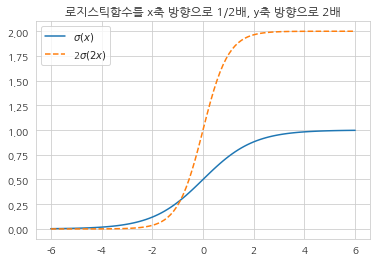

In [107]:
xx = np.linspace(-6, 6, 100)
plt.plot(xx, logistic(xx), label="$\sigma(x)$", ls="-")
plt.plot(xx, 2*logistic(xx * 2), label="2$\sigma(2x)$", ls="--")
plt.legend()
plt.title("로지스틱함수를 x축 방향으로 1/2배, y축 방향으로 2배")
plt.show()